<a href="https://colab.research.google.com/github/pragatheeswaran-cds/IISC-CAPSTONE-PROJECT/blob/praga-upload/Insurance_Product_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import shutil
import pandas as pd
import seaborn as sns

source_path = "/content/Train.csv"  # change this to your file path


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv(source_path)
df.head()


,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [8]:
print("Shape of data:", df.shape)

Shape of data: (29132, 29)


In [9]:
print("\nColumns:", df.columns)



Columns: Index(['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'],
      dtype='object')


In [10]:
print("\nData Types:\n", df.dtypes)


Data Types:
 ID                          object
join_date                   object
sex                         object
marital_status              object
birth_year                   int64
branch_code                 object
occupation_code             object
occupation_category_code    object
P5DA                         int64
RIBP                         int64
8NN1                         int64
7POT                         int64
66FJ                         int64
GYSR                         int64
SOP4                         int64
RVSZ                         int64
PYUQ                         int64
LJR9                         int64
N2MW                         int64
AHXO                         int64
BSTQ                         int64
FM3X                         int64
K6QO                         int64
QBOL                         int64
JWFN                         int64
JZ9D                         int64
J9JW                         int64
GHYX                         int64
ECY3  

In [11]:

print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 ID                          0
join_date                   2
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
GYSR                        0
SOP4                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
GHYX                        0
ECY3                        0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

In [14]:
df.dropna(inplace=True)

Skipping ID (too many unique values: 29130)
Skipping join_date (too many unique values: 132)


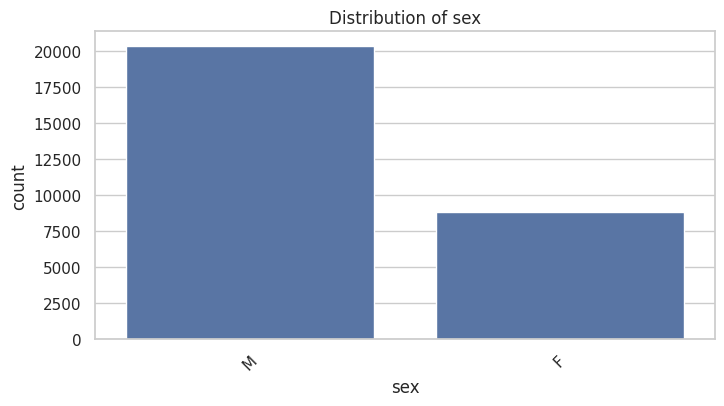

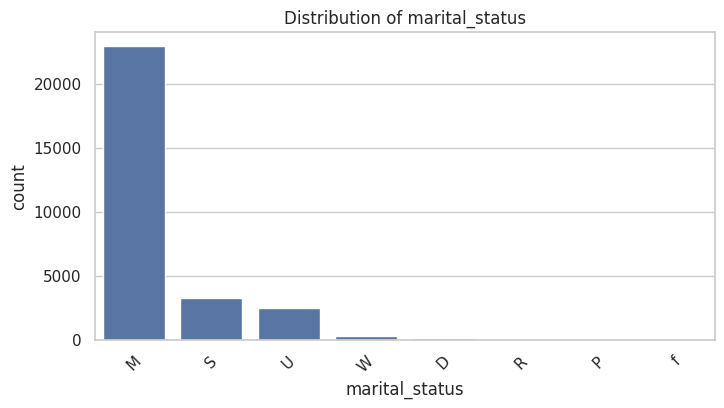

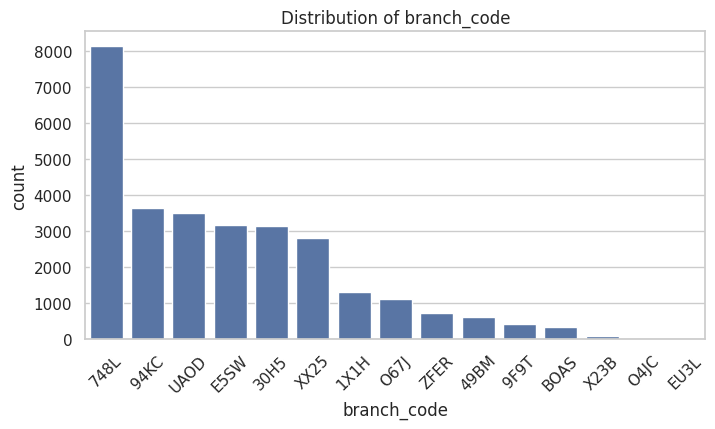

Skipping occupation_code (too many unique values: 233)


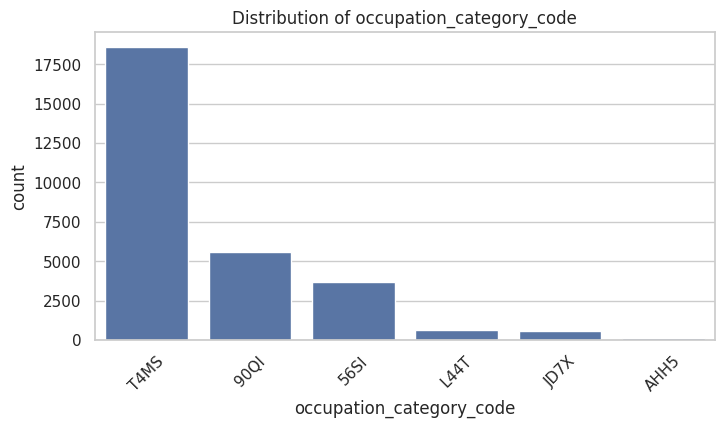

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() <= 20:  # Skip high-cardinality columns
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Skipping {col} (too many unique values: {df[col].nunique()})")


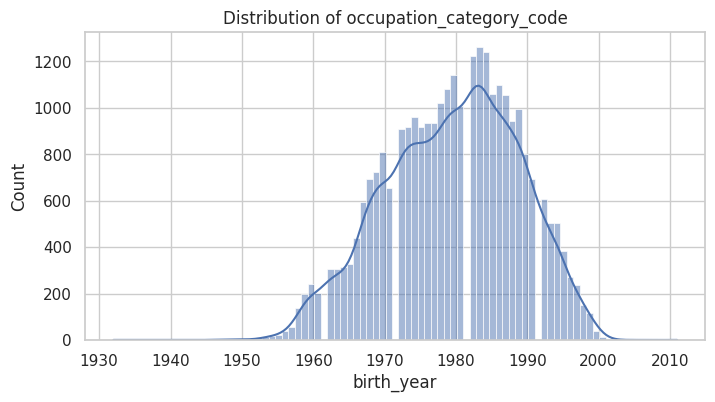

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['birth_year'].dropna(), kde=True)
plt.title(f"Distribution of {col}")
plt.show()

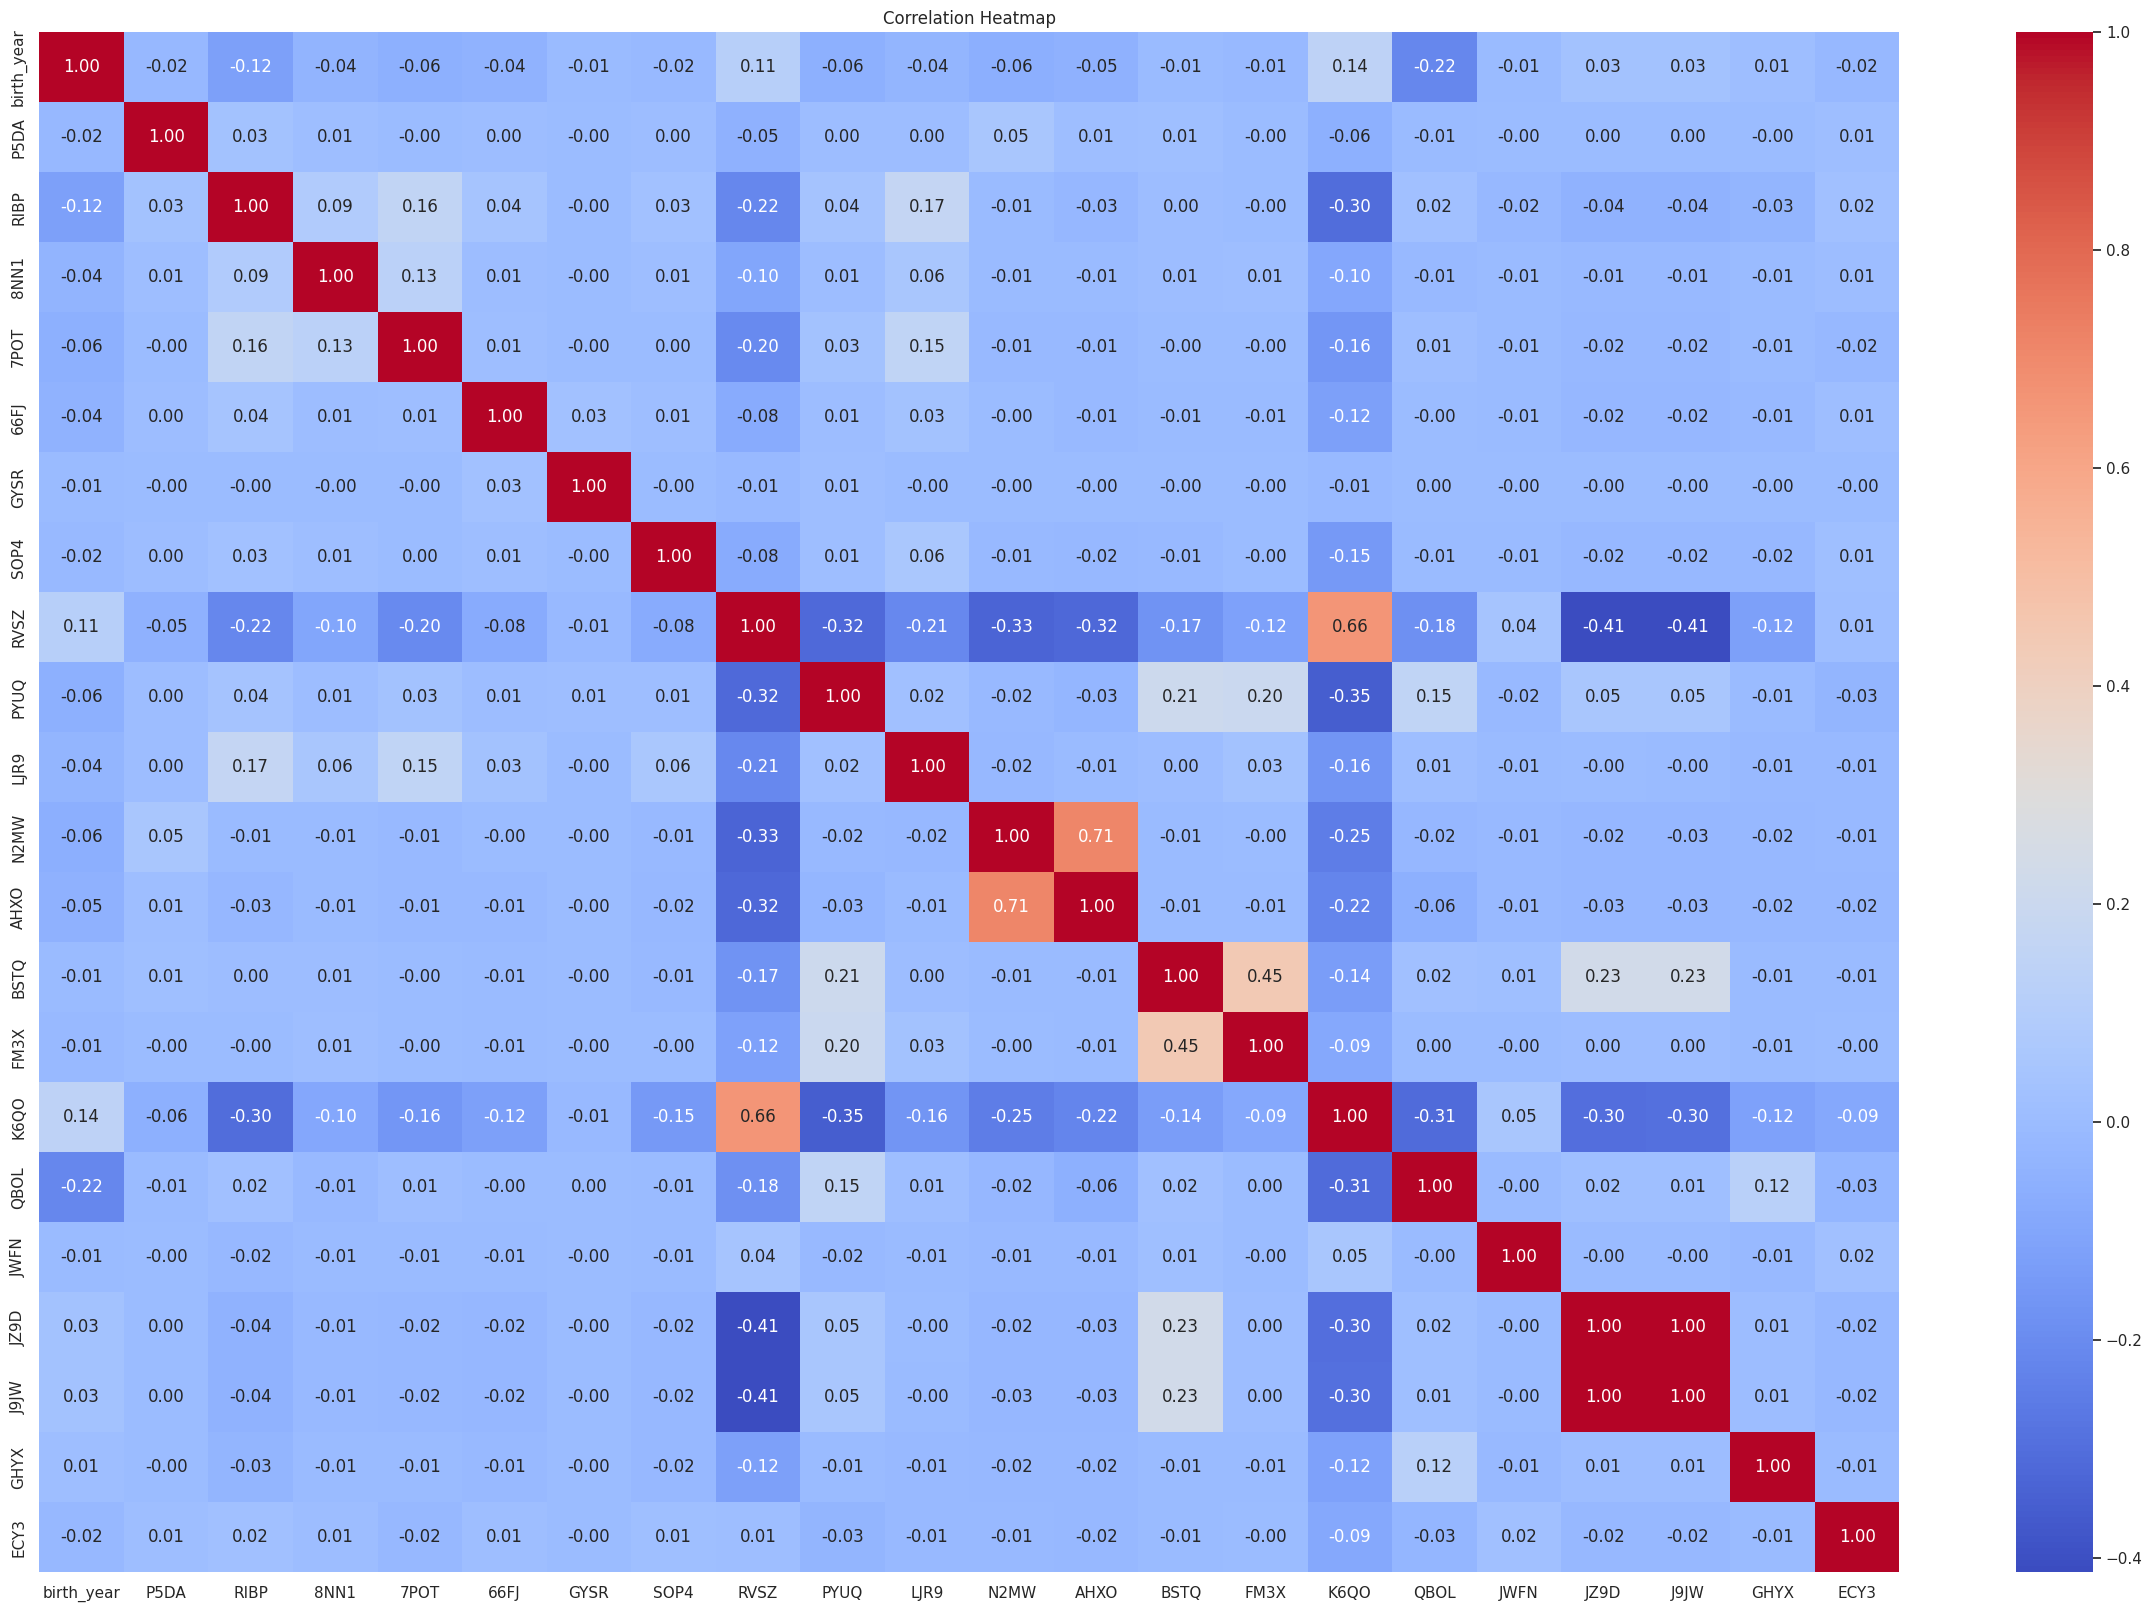

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(30,20))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

birth_year: 17 outliers
P5DA: 40 outliers
RIBP: 1779 outliers
8NN1: 157 outliers
7POT: 316 outliers
66FJ: 339 outliers
GYSR: 4 outliers
SOP4: 431 outliers
RVSZ: 3803 outliers
PYUQ: 2173 outliers
LJR9: 354 outliers
N2MW: 838 outliers
AHXO: 539 outliers
BSTQ: 324 outliers
FM3X: 110 outliers
K6QO: 0 outliers
QBOL: 6832 outliers
JWFN: 310 outliers
JZ9D: 1425 outliers
J9JW: 1418 outliers
GHYX: 902 outliers
ECY3: 1100 outliers


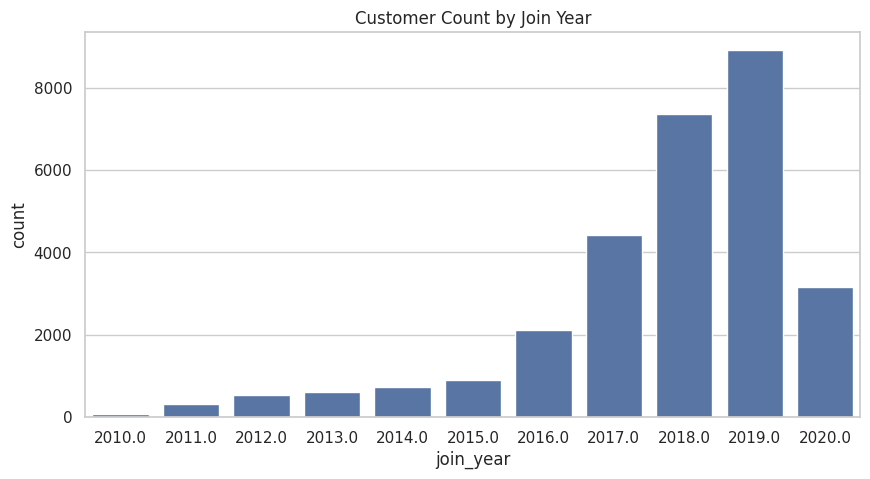

In [23]:
if 'join_date' in df.columns:
    df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')
    df['join_year'] = df['join_date'].dt.year
    df['join_month'] = df['join_date'].dt.month

    plt.figure(figsize=(10, 5))
    sns.countplot(x='join_year', data=df)
    plt.title("Customer Count by Join Year")
    plt.show()


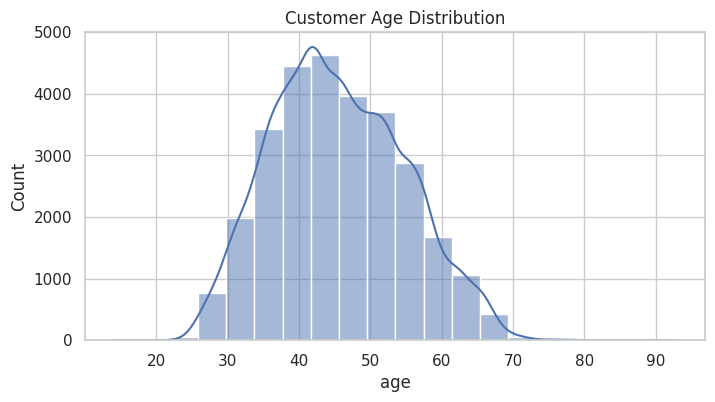

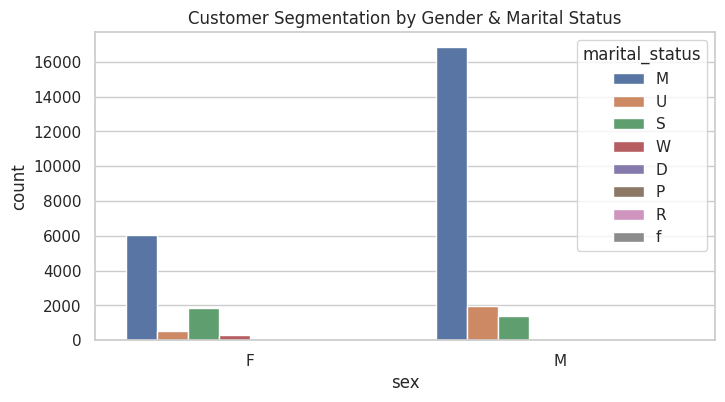

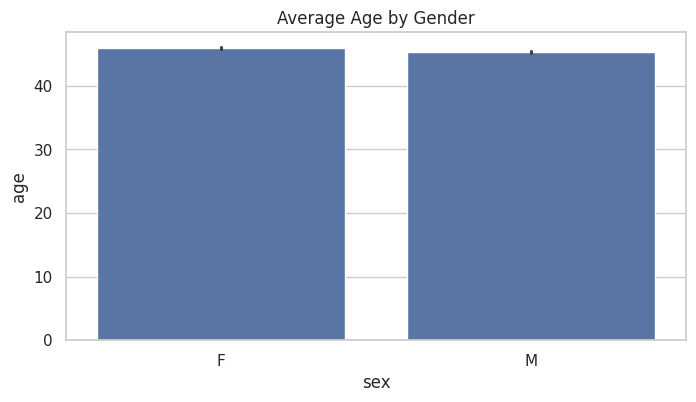

In [24]:
if {'sex', 'marital_status', 'birth_year'}.issubset(df.columns):
    # Age calculation (assuming current year = 2025)
    df['age'] = 2025 - df['birth_year']

    # Age distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(df['age'], bins=20, kde=True)
    plt.title("Customer Age Distribution")
    plt.show()

    # Segmentation by Gender & Marital Status
    plt.figure(figsize=(8, 4))
    sns.countplot(x='sex', hue='marital_status', data=df)
    plt.title("Customer Segmentation by Gender & Marital Status")
    plt.show()

    # Average Age by Gender
    plt.figure(figsize=(8, 4))
    sns.barplot(x='sex', y='age', data=df)
    plt.title("Average Age by Gender")
    plt.show()
